In [254]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialize global variables
cluster_Num = 3
color = ['red', 'black', 'blue', 'orange']
C = []  # List to store individual data point clusters
D = []  # List to store cluster merge information
x = []  # List to store x-coordinates
y = []  # List to store y-coordinates
x_ = 0

# Read data from the file
data = open('dataset.txt')

for line in data.readlines():
    x.append(float(line.strip().split('\t')[0]))
    y.append(float(line.strip().split('\t')[1]))

# Initialize each data point as a separate cluster
for i in range(len(x)):
    C.append([i])

# Function to calculate distance between two clusters
def distance(Ci, Cj):
    dis = []
    for i in Ci:
        for j in Cj:
            dis.append(np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2))
    dis = list(set(dis))
    return np.mean(dis)

# Function to find the two closest clusters
def find_Two_cluster():
    temp = []
    for i in range(len(C)):
        for j in range(i + 1, len(C)):
            dis = distance(C[i], C[j])
            temp.append([i, j, dis])
    temp = sorted(temp, key=lambda x: x[2])
    return temp[0][0], temp[0][1], temp[0][2]

# Agglomerative clustering algorithm
def agnes():
    global C
    global D
    distance_matrix = []  # To store distances in matrix form
    while len(C) > cluster_Num:
        i, j, dis = find_Two_cluster()
        distance_matrix.append([i, j, dis])
        merge = C[i] + C[j]
        C = [C[t] for t in range(len(C)) if t != i and t != j]
        C.append(merge)
        D.append([i, j])

#     Scatter plot for each cluster
    for i in range(len(C)):
        X = []
        Y = []
        for j in range(len(C[i])):
            X.append(x[C[i][j]])
            Y.append(y[C[i][j]])
            plt.text(X[-1], Y[-1], str(j), fontsize=8, ha='left', va='center', color='black')
        plt.scatter(X, Y)

#     plt.legend(['C1', 'C2', 'C3', 'C4'])
    plt.title('Agnes Clustering')
    plt.show()



# Call the agnes function
# agnes()


In [255]:
# Print the cluster merge information
df = pd.DataFrame({'X': x, 'Y': y})
df2 = pd.DataFrame(D)
print("Original Data:")
df.head()

Original Data:


,X,Y
0,1.658985,4.285136
1,3.453687,3.424321
2,4.838138,1.151539
3,5.379713,3.362104
4,0.972564,2.924086


[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]


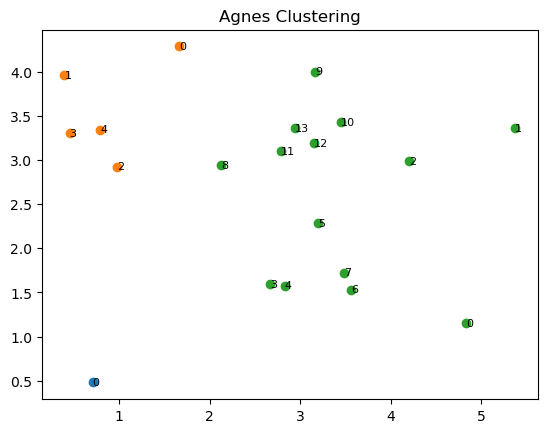

In [256]:
if __name__ == '__main__':
    print(C)
    agnes()

In [235]:

# Function to plot hierarchical clustering dendrogram
cluster_Num = 1
def dendo():
    # Perform hierarchical clustering using the merge information
    Z = linkage(D, 'single')
#     print(Z)
    # Plot dendrogram
    dendrogram(Z)

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data point')
    plt.ylabel('Distance')
    plt.show()

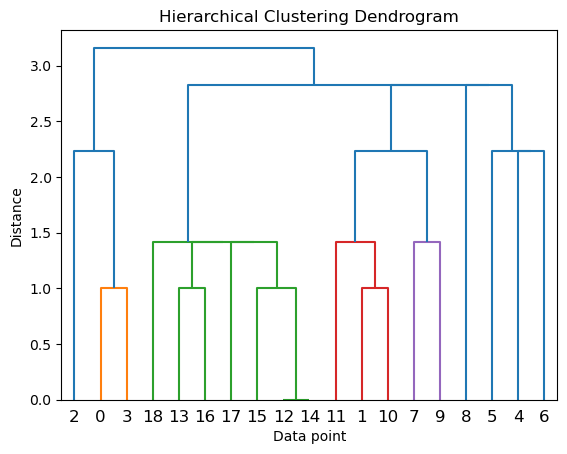

In [224]:
dendo()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


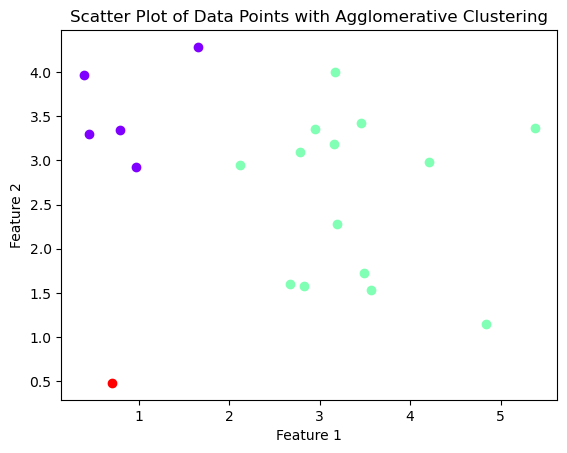

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def find_closest_clusters(clusters):
    min_distance = float('inf')
    closest_clusters = None, None

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            distance = euclidean_distance(np.mean(clusters[i], axis=0), np.mean(clusters[j], axis=0))
            if distance < min_distance:
                min_distance = distance
                closest_clusters = i, j

    return closest_clusters

def agnes(data, k):
    # Initialize clusters
    clusters = [[point] for point in data]

    while len(clusters) > k:
        i, j = find_closest_clusters(clusters)

        # Merge the closest clusters
        clusters[i].extend(clusters[j])
        del clusters[j]

    return clusters

def plot_clusters(clusters):
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(clusters))))

    for cluster in clusters:
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=next(colors), marker='o')

    plt.title('Scatter Plot of Data Points with Agglomerative Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# def plot_dendrogram(clusters):
#     linkage_matrix = np.zeros((len(clusters) - 1, 4))

#     for idx, cluster in enumerate(clusters):
#         print(linkage_matrix)
#         linkage_matrix[idx, 0] = cluster[0][0]
#         linkage_matrix[idx, 1] = cluster[-1][0]
#         linkage_matrix[idx, 2] = len(cluster)
#         linkage_matrix[idx, 3] = len(cluster)

#     plt.figure(figsize=(12, 8))
#     dendrogram(linkage_matrix)
#     plt.title('Hierarchical Clustering Dendrogram')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Distance')
#     plt.show()


# Load data from the dataset.txt file
data = np.loadtxt('dataset.txt', delimiter='\t')

# Specify the desired number of clusters
k = 3

# Perform Agglomerative Hierarchical Clustering
clusters = agnes(data, k)

# Plot scatter plot with clusters
plot_clusters(clusters)

# Plot dendrogram
# plot_dendrogram(clusters)
